In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib notebook

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import xarray as xr

import pims
from pims import ND2_Reader

import sys
sys.path.append("C:/Users/rmcgorty/Documents/GitHub/trackpy")
import trackpy as tp

import pickle

In [5]:
with open(r"210624_Vimentin_m025_p06_A_TRAJECTORY.pkl", "rb") as input_file:
    tA = pickle.load(input_file)
with open(r"210624_Vimentin_m025_p06_A1_TRAJECTORY.pkl", "rb") as input_file:
    tA1 = pickle.load(input_file)
with open(r"210624_Vimentin_m025_p06_B_TRAJECTORY.pkl", "rb") as input_file:
    tB = pickle.load(input_file)
'''
with open(r"210624_Vimentin_m025_p06_B001_TRAJECTORY.pkl", "rb") as input_file:
    tB1 = pickle.load(input_file)
'''

'\nwith open(r"210624_Vimentin_m025_p06_B001_TRAJECTORY.pkl", "rb") as input_file:\n    tB1 = pickle.load(input_file)\n'

In [18]:
d = tp.compute_drift(tA)
tAd = tp.subtract_drift(tA.copy(), d)
d = tp.compute_drift(tA1)
tA1d = tp.subtract_drift(tA1.copy(), d)
d = tp.compute_drift(tB)
tBd = tp.subtract_drift(tB.copy(), d)

In [22]:
imxA = tp.imsd(tAd, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA = tp.imsd(tAd, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxA1 = tp.imsd(tA1d, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA1 = tp.imsd(tA1d, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB = tp.imsd(tBd, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB = tp.imsd(tBd, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

#imxB1 = tp.imsd(tB1, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
#imyB1 = tp.imsd(tB1, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

<IPython.core.display.Javascript object>


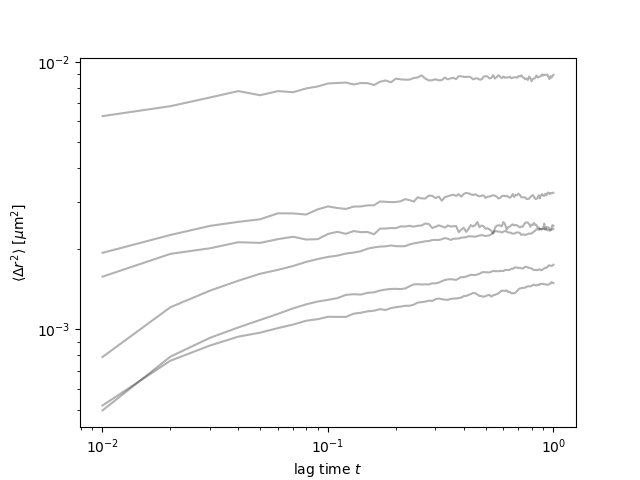

In [21]:
im = tp.imsd(tA, 0.13, 99.92)
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.3)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

In [23]:
isf = np.zeros((5,1000),dtype=np.complex128)
isf_std = np.zeros_like(isf)
isf_stderr = np.zeros_like(isf)
q = 2*np.sqrt(2)
count=0

qs = np.array([1.98,3.02,3.96,5.0,6.04])

for j in range(5):
    q = qs[j]*np.pi/2
    for i in range(1000):
        count=0
        temp = []
        for particle in imxA.keys():
            if not np.isnan(imxA[particle].values[i]):
                temp.append(np.exp(-1j*q*imxA[particle].values[i]))
                temp.append(np.exp(1j*q*imxA[particle].values[i]))
                temp.append(np.exp(-1j*q*imyA[particle].values[i]))
                temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxA[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyA[particle].values[i]))
        for particle in imxA1.keys():
            if not np.isnan(imxA1[particle].values[i]):
                temp.append(np.exp(-1j*q*imxA1[particle].values[i]))
                temp.append(np.exp(1j*q*imxA1[particle].values[i]))
                temp.append(np.exp(-1j*q*imyA1[particle].values[i]))
                temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxA1[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyA1[particle].values[i]))
        for particle in imxB.keys():
            if not np.isnan(imxB[particle].values[i]):
                temp.append(np.exp(-1j*q*imxB[particle].values[i]))
                temp.append(np.exp(1j*q*imxB[particle].values[i]))
                temp.append(np.exp(-1j*q*imyB[particle].values[i]))
                temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxB[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyB[particle].values[i]))
        '''
        for particle in imxB1.keys():
            if not np.isnan(imxB1[particle].values[i]):
                temp.append(np.exp(-1j*q*imxB1[particle].values[i]))
                temp.append(np.exp(1j*q*imxB1[particle].values[i]))
                temp.append(np.exp(-1j*q*imyB1[particle].values[i]))
                temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxB1[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyB1[particle].values[i]))
        '''
        isf[j,i] = np.mean(temp)
        isf_std[j,i] = np.std(temp)
        isf_stderr[j,i] = np.std(temp)/np.sqrt(len(temp)/4)
        #isf[i] = isf[i]/count

<IPython.core.display.Javascript object>


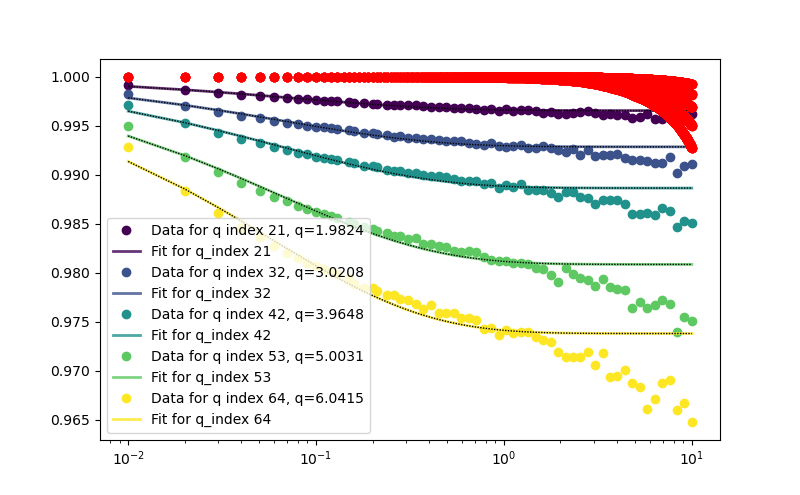

C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [25]:
usernm = 'rmcgorty'
fit_saved_dir = "C:/Users/%s/Dropbox/ManuscriptsInProgress/DDM of cytoskeleton - JoVE/Data/" % usernm
fit025_06_A = xr.open_dataset(fit_saved_dir+"ddm_fits/fit025_06_A.nc")
fit025_06_A1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit025_06_A1.nc")
fit025_06_B = xr.open_dataset(fit_saved_dir+"ddm_fits/fit025_06_B.nc")
fit025_06_B1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit025_06_B1.nc")

cmap = plt.get_cmap("viridis") 

fig_width = 8
markersize = 6 #was 1
fig, ax = plt.subplots(nrows=1, figsize=(fig_width,fig_width/1.618))
data = 0.25 * (fit025_06_A.isf_data + fit025_06_A1.isf_data + fit025_06_B.isf_data + fit025_06_B1.isf_data)
theory = 0.25 * (fit025_06_A.theory + fit025_06_A1.theory + fit025_06_B.theory + fit025_06_B1.theory)
times = fit025_06_A.lagtime
q = fit025_06_A.q    
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

#q_index_to_plot = np.arange(12,100,7)
q_index_to_plot = np.array([21,32,42,53,64])
clrs = np.linspace(0,1,len(q_index_to_plot))
for i,qv in enumerate([21,32,42,53,64]):
    plt_color = cmap(clrs[i])
    qv = int(qv)

    ax.semilogx(times, data[:,qv], 'o', ms=markersize, color=plt_color, label="Data for q index %i, q=%.4f" % (qv, q[qv]))
    ax.semilogx(times, theory[:,qv], '-', color=plt_color, lw=2, alpha=0.8, label="Fit for q_index %i" % qv)
    ax.semilogx(times, theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)
    
    ax.semilogx(imxA.index, isf[i,:], 'ro')
    #ax.errorbar(imxA.index, isf[i,:], yerr=isf_stderr[i,:], fmt='none', color='r')

plt.legend()

#plt.semilogx(imxA.index, isf, 'ro')
#plt.errorbar(imxA.index, isf, yerr=isf_stderr, fmt='none', color='r')

Mentions getting the ISF from single particle tracking data:
https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.078001


In [11]:
isf = np.zeros((5,1000),dtype=np.complex128)
isf_std = np.zeros_like(isf)
isf_stderr = np.zeros_like(isf)
q = 2*np.sqrt(2)
count=0

qs = np.array([1.98,3.02,3.96,5.0,6.04])

for j in range(5):
    q = qs[j]*np.pi/2
    
    qx = np.arange(0, q, 0.1)
    qy = np.sqrt(q**2 - qx**2)
    
    for i in range(1000):
        count=0
        temp = []
        for particle in imxA.keys():
            if not np.isnan(imxA[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                temp.append(np.mean(temp2))
       
        for particle in imxA1.keys():
            if not np.isnan(imxA1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                temp.append(np.mean(temp2))
                    
        for particle in imxB.keys():
            if not np.isnan(imxB[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                temp.append(np.mean(temp2))
        '''            
        for particle in imxB1.keys():
            if not np.isnan(imxB1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                temp.append(np.mean(temp2))
        '''  
        isf[j,i] = np.mean(temp)
        isf_std[j,i] = np.std(temp)
        isf_stderr[j,i] = np.std(temp)/np.sqrt(len(temp))
        #isf[i] = isf[i]/count

<IPython.core.display.Javascript object>


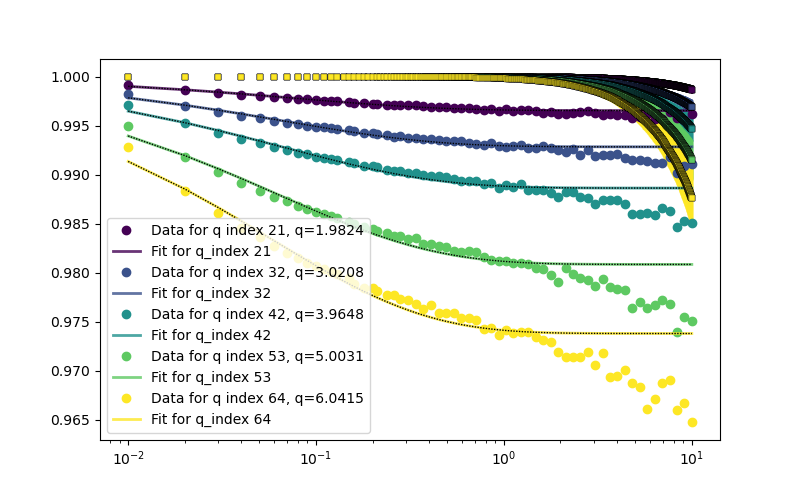

C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex valu

In [14]:
fig_width = 8
markersize = 6 #was 1
fig, ax = plt.subplots(nrows=1, figsize=(fig_width,fig_width/1.618))
data = 0.25 * (fit025_06_A.isf_data + fit025_06_A1.isf_data + fit025_06_B.isf_data + fit025_06_B1.isf_data)
theory = 0.25 * (fit025_06_A.theory + fit025_06_A1.theory + fit025_06_B.theory + fit025_06_B1.theory)
times = fit025_06_A.lagtime
q = fit025_06_A.q    
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

#q_index_to_plot = np.arange(12,100,7)
q_index_to_plot = np.array([21,32,42,53,64])
clrs = np.linspace(0,1,len(q_index_to_plot))
for i,qv in enumerate([21,32,42,53,64]):
    plt_color = cmap(clrs[i])
    qv = int(qv)

    ax.semilogx(times, data[:,qv], 'o', ms=markersize, color=plt_color, label="Data for q index %i, q=%.4f" % (qv, q[qv]))
    ax.semilogx(times, theory[:,qv], '-', color=plt_color, lw=2, alpha=0.8, label="Fit for q_index %i" % qv)
    ax.semilogx(times, theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)
    
    #ax.semilogx(imxA.index, (isf[i,:]*np.conj(isf[i,:]))**1, 's', ms=4, color=plt_color, mec='k', mew=0.2)
    #ax.errorbar(imxA.index, (isf[i,:]*np.conj(isf[i,:]))**1, yerr=isf_stderr[i,:], fmt='none', color=plt_color, lw=1)
    
    ax.semilogx(imxA.index, np.real(isf[i,:]), 's', ms=4, color=plt_color, mec='k', mew=0.2)
    ax.errorbar(imxA.index, np.real(isf[i,:]), yerr=isf_stderr[i,:], fmt='none', color=plt_color, lw=1)

plt.legend()

#plt.semilogx(imxA.index, isf, 'ro')
#plt.errorbar(imxA.index, isf, yerr=isf_stderr, fmt='none', color='r')

In [28]:
qx

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

In [26]:
isf[0,:]

array([1.        +6.07453835e-06j, 0.99999999-3.61082429e-05j,
       0.99999996-5.96660151e-05j, 0.99999997-7.29263956e-05j,
       0.99999996-8.70142380e-05j, 0.99999994-1.07523431e-04j,
       0.9999999 -1.28748173e-04j, 0.99999992-1.20051276e-04j,
       0.99999992-1.25186203e-04j, 0.9999999 -1.44842389e-04j,
       0.99999986-1.62122326e-04j, 0.99999986-1.69850550e-04j,
       0.99999985-1.69616673e-04j, 0.99999981-1.92849578e-04j,
       0.99999978-2.13046722e-04j, 0.99999976-2.26288435e-04j,
       0.99999971-2.54390250e-04j, 0.99999966-2.62591772e-04j,
       0.99999966-2.62572893e-04j, 0.99999958-3.03203481e-04j,
       0.99999954-3.01931368e-04j, 0.99999946-3.25488913e-04j,
       0.99999941-3.33149405e-04j, 0.99999942-3.40712304e-04j,
       0.99999935-3.67347810e-04j, 0.9999993 -3.87429008e-04j,
       0.99999927-3.90593022e-04j, 0.99999921-4.09698254e-04j,
       0.99999914-4.29409896e-04j, 0.9999991 -4.42778973e-04j,
       0.99999913-4.30760388e-04j, 0.99999894-4.6058946

In [48]:
qx

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ])

In [51]:
isf[1,:]

array([0.85529362+4.51380484e-02j, 0.84566286+4.68672983e-02j,
       0.84126504+4.54039525e-02j, 0.83577303+4.54485819e-02j,
       0.83236907+4.48459240e-02j, 0.82536314+4.53821059e-02j,
       0.82389843+4.48406763e-02j, 0.82006126+4.53696555e-02j,
       0.81619272+4.66977216e-02j, 0.80846275+4.54271959e-02j,
       0.80441805+4.30211218e-02j, 0.80202062+4.46694766e-02j,
       0.8017679 +4.32124072e-02j, 0.80022651+4.17261164e-02j,
       0.80264456+4.07265593e-02j, 0.80252835+4.20613666e-02j,
       0.79710033+4.19183003e-02j, 0.79214446+4.16126103e-02j,
       0.78580049+4.18000565e-02j, 0.78136164+4.21633524e-02j,
       0.77596938+4.17777067e-02j, 0.77359589+4.01565318e-02j,
       0.77064944+4.11379897e-02j, 0.76902728+4.22373634e-02j,
       0.76633259+4.28799592e-02j, 0.76613825+4.20710512e-02j,
       0.76056986+4.20172105e-02j, 0.7526964 +4.20034078e-02j,
       0.75097318+4.09889965e-02j, 0.74719777+4.18784507e-02j,
       0.74461821+4.27536993e-02j, 0.74305569+4.1246503